comparing regional CS2_CPOM and SM-LG smoothed anomalies for 2010-2020 seasons 1 Dec - 30 Apr

In [1]:
import numpy as np
from scipy.stats import pearsonr
import datetime
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib import gridspec
import datetime
import seaborn as sns
import os
import tqdm
import warnings
warnings.filterwarnings("ignore")

In [72]:
# load data
df = pd.read_csv('/Users/carmennab/PhD/OI_PolarSnow/dataframes/WG_vs_SM_regional_anomalies_smoothed.csv',header=[0,1,2])
regions = ['Baffin','Greenland','Barents','Kara','Laptev','Sib','Chuk','Bea','Can','Cen']
random_SM = ['Unnamed: 91_level_2','Unnamed: 92_level_2','Unnamed: 93_level_2','Unnamed: 94_level_2','Unnamed: 95_level_2','Unnamed: 96_level_2','Unnamed: 97_level_2','Unnamed: 98_level_2',
             'Unnamed: 99_level_2','Unnamed: 100_level_2']
seasons = ['2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016','2016-2017','2017-2018','2018-2019',
          '2019-2020']

dates = df['Unnamed: 0_level_0']['Unnamed: 0_level_1']['Date']

# 1 Oct - 30 April
days = [np.arange(273,484), # 2010-2011
        np.arange(638,850), # 2011-2012
        np.arange(1004,1215), # 2012-2013
        np.arange(1369,1580), # 2013-2014
        np.arange(1734,1945), # 2014-2015
        np.arange(2099,2311), # 2015-2016
        np.arange(2464,2676), # 2016-2017
        np.arange(2830,3041), # 2017-2018
        np.arange(3194,3406), # 2018-2019
        np.arange(3560,3772) # 2019-2020
       ]

In [73]:
def stats():
    fb = df[sat][region][rando_C][day].squeeze()
    snow = df['SM'][region][rando_S][day].squeeze()
    mask = ~np.isnan(fb) & ~np.isnan(snow) 
    try:
        rstats = pearsonr(snow[mask],fb[mask])
        r = np.round(rstats[0],decimals=2)
        p = np.round(rstats[1],decimals=3)
        return(p,r)
        print(region,': r = ',r, ' , p = ',p)
    except:
        print(region,': no data')

# Regional stats table

In [74]:
Baf = {}
Green = {}
Bar = {}
Kara = {}
Laptev = {}
Sib = {} 
Chuk = {} 
Bea = {}
Can = {}
Cen = {}

ps = np.full((10,10),np.nan)

counters = np.arange(0,10)

dics = [Baf,Green,Bar,Kara,Laptev,Sib,Chuk,Bea,Can,Cen]

random_CPOM = ['Unnamed: 21_level_2','Unnamed: 22_level_2','Unnamed: 23_level_2','Unnamed: 24_level_2','Unnamed: 25_level_2','Unnamed: 26_level_2','Unnamed: 27_level_2','Unnamed: 28_level_2',
               'Unnamed: 29_level_2','Unnamed: 30_level_2']
sat = 'CS2_CPOM'
    
for region, rando_C, rando_S, dic, counter in zip(regions, random_CPOM, random_SM, dics, counters):
    for season, day, count in zip(seasons, days, counters):
        p,r = stats()
        dic[season] = r
        ps[count,counter] = p
    
df_Baf = pd.DataFrame.from_dict(Baf, columns=[' '], orient = 'index')
df_Green = pd.DataFrame.from_dict(Green, columns=[' '], orient = 'index')
df_Bar = pd.DataFrame.from_dict(Bar, columns=[' '], orient = 'index')
df_Kara = pd.DataFrame.from_dict(Kara, columns=[' '], orient = 'index')
df_Laptev = pd.DataFrame.from_dict(Laptev, columns=[' '], orient = 'index')
df_Sib = pd.DataFrame.from_dict(Sib, columns=[' '], orient = 'index')
df_Chuk = pd.DataFrame.from_dict(Chuk, columns=[' '], orient = 'index')
df_Bea = pd.DataFrame.from_dict(Bea, columns=[' '], orient = 'index')
df_Can = pd.DataFrame.from_dict(Can, columns=[' '], orient = 'index')
df_Cen = pd.DataFrame.from_dict(Cen, columns=[' '], orient = 'index')

In [75]:
sets = [df_Baf,df_Green,df_Bar,df_Kara,df_Laptev,df_Sib,df_Chuk,df_Bea,df_Can,df_Cen] 

df_combined = pd.concat(
    [df.rename(columns=lambda x: x.zfill(0)) for df in sets],
    keys=['Baffin','Greenland','Barents','Kara', 'Laptev', 'E. Siberian', 'Chukchi', 'Beaufort', 'Can. Arch.','Central Arctic'],
    axis=1)

In [76]:
df_combined

,Baffin,Greenland,Barents,Kara,Laptev,E. Siberian,Chukchi,Beaufort,Can. Arch.,Central Arctic
,,,,,,,,,,
2010-2011,-0.10,0.14,0.13,-0.35,-0.28,0.13,0.63,0.01,-0.15,-0.55
2011-2012,-0.38,0.45,0.03,-0.41,-0.11,-0.35,-0.02,-0.25,-0.06,-0.23
2012-2013,0.15,0.12,-0.27,-0.29,0.52,0.25,-0.02,-0.22,0.03,-0.16
2013-2014,-0.08,0.49,-0.39,0.05,0.21,0.58,0.37,-0.34,0.29,-0.12
2014-2015,-0.06,0.31,-0.26,0.07,0.14,-0.44,-0.25,-0.11,-0.16,-0.14
2015-2016,-0.28,0.33,0.19,0.32,0.07,0.27,0.12,0.44,0.15,0.02
2016-2017,-0.00,0.15,0.31,-0.30,-0.65,0.30,-0.28,0.24,0.17,0.06
2017-2018,-0.39,0.47,0.18,-0.06,0.47,0.29,0.17,-0.03,-0.17,-0.42
2018-2019,-0.03,0.15,0.13,-0.01,-0.36,0.03,0.26,0.06,0.28,0.10


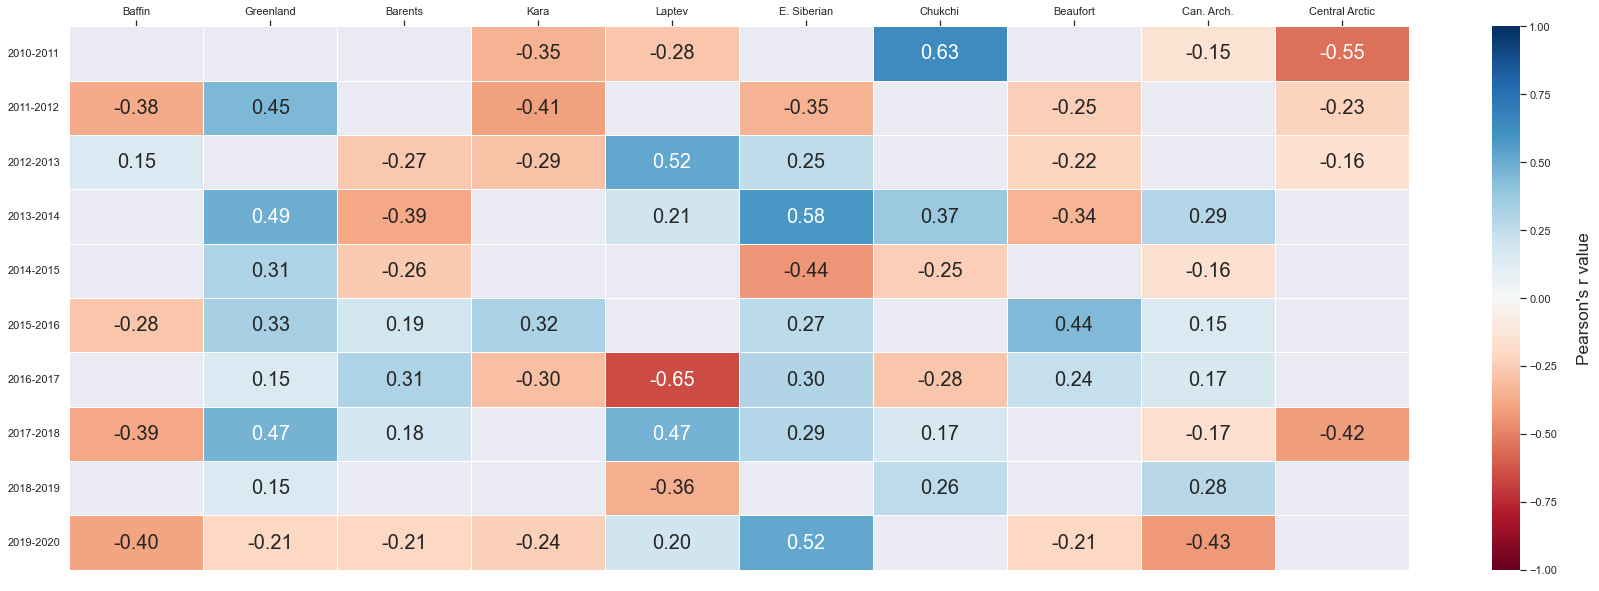

In [77]:
mask = ps.copy()
mask[mask>0.05] = 1000
mask[mask<1000] = 0

keys = ['Baffin','Greenland','Barents','Kara', 'Laptev', 'E. Siberian', 'Chukchi', 'Beaufort', 'Can. Arch.','Central Arctic']
ax = sns.heatmap(df_combined, mask=mask, cmap='RdBu', annot=True, fmt=".2f", vmin=-1, vmax=1,linewidths=0.5, annot_kws={"fontsize":20}, yticklabels=seasons)
sns.set(rc = {'figure.figsize':(30,10)})
ax.xaxis.tick_top()
ax.set_xlabel(' ')    
ax.set_yticklabels(seasons,rotation = 0)
ax.set_xticklabels(keys)
ax.collections[0].colorbar.set_label("Pearson's r value",fontsize='x-large',labelpad=20)
# for (j,i), label in np.ndenumerate(df_combined.values):
#     if mask[j,i] == 1000:
#         ax.text(i+0.5, j+0.5, label, 
#                 fontdict=dict(ha='center',  va='center',
#                                          color='k', fontsize=20))
plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Snow Interpolated Freeboards/figures/regional_stats.png',bbox_inches = "tight")

# CS2_Bristol, CS2_S3_CPOM & CS2_S3_Bristol tables for supplement

In [78]:
# CS2_Bristol
Baf = {}
Green = {}
Bar = {}
Kara = {}
Laptev = {}
Sib = {} 
Chuk = {} 
Bea = {}
Can = {}
Cen = {}

CS2_Bristol_ps = np.full((10,10),np.nan)

counters = np.arange(0,10)

dics = [Baf,Green,Bar,Kara,Laptev,Sib,Chuk,Bea,Can,Cen]

random_Bristol = ['Unnamed: 11_level_2','Unnamed: 12_level_2','Unnamed: 13_level_2','Unnamed: 14_level_2','Unnamed: 15_level_2','Unnamed: 16_level_2','Unnamed: 17_level_2','Unnamed: 18_level_2',
               'Unnamed: 19_level_2','Unnamed: 20_level_2']
sat = 'CS2_Bristol'
    
for region, rando_C, rando_S, dic, counter in zip(regions, random_Bristol, random_SM, dics, counters):
    for season, day, count in zip(seasons, days, counters):
        p,r = stats()
        dic[season] = r
        CS2_Bristol_ps[count,counter] = p
    
df_Baf = pd.DataFrame.from_dict(Baf, columns=[' '], orient = 'index')
df_Green = pd.DataFrame.from_dict(Green, columns=[' '], orient = 'index')
df_Bar = pd.DataFrame.from_dict(Bar, columns=[' '], orient = 'index')
df_Kara = pd.DataFrame.from_dict(Kara, columns=[' '], orient = 'index')
df_Laptev = pd.DataFrame.from_dict(Laptev, columns=[' '], orient = 'index')
df_Sib = pd.DataFrame.from_dict(Sib, columns=[' '], orient = 'index')
df_Chuk = pd.DataFrame.from_dict(Chuk, columns=[' '], orient = 'index')
df_Bea = pd.DataFrame.from_dict(Bea, columns=[' '], orient = 'index')
df_Can = pd.DataFrame.from_dict(Can, columns=[' '], orient = 'index')
df_Cen = pd.DataFrame.from_dict(Cen, columns=[' '], orient = 'index')

sets = [df_Baf,df_Green,df_Bar,df_Kara,df_Laptev,df_Sib,df_Chuk,df_Bea,df_Can,df_Cen] 

df_CS2_Bristol = pd.concat(
    [df.rename(columns=lambda x: x.zfill(0)) for df in sets],
    keys=['Baffin','Greenland','Barents','Kara', 'Laptev', 'E. Siberian', 'Chukchi', 'Beaufort', 'Can. Arch.','Central Arctic'],
    axis=1)

In [79]:
# CS2_S3_CPOM
dic = {}

CS2_S3_CPOM_ps = np.full((1,10),np.nan)

counters_r = np.arange(0,10)

random_CPOM = ['Unnamed: 1_level_2','Unnamed: 2_level_2','Unnamed: 3_level_2','Unnamed: 4_level_2','Unnamed: 5_level_2',
               'Unnamed: 6_level_2','Unnamed: 7_level_2','Unnamed: 8_level_2','Unnamed: 9_level_2','Unnamed: 10_level_2']
sat = 'CS2_S3_GPOD'
season = '2019-2020'
    
for region, rando_C, rando_S, counter in zip(regions, random_CPOM, random_SM, counters):
        p,r = stats()
        dic[region] = [r]
        CS2_S3_CPOM_ps[0,counter] = p
    
df_CS2_S3_CPOM = pd.DataFrame.from_dict(dic,orient = 'columns')
df_CS2_S3_CPOM

,Baffin,Greenland,Barents,Kara,Laptev,Sib,Chuk,Bea,Can,Cen
0,0.13,-0.11,-0.18,-0.2,0.34,0.56,-0.3,-0.27,-0.12,-0.06


In [80]:
# CS2_S3_Bristol
dic = {}

CS2_S3_Bristol_ps = np.full((1,10),np.nan)

counters_r = np.arange(0,10)

random_Bristol = ['Unnamed: 81_level_2','Unnamed: 82_level_2','Unnamed: 83_level_2','Unnamed: 84_level_2','Unnamed: 85_level_2',
               'Unnamed: 86_level_2','Unnamed: 87_level_2','Unnamed: 88_level_2','Unnamed: 89_level_2','Unnamed: 90_level_2']
sat = 'CS2_S3_Bristol'
season = '2019-2020'
    
for region, rando_C, rando_S, counter in zip(regions, random_Bristol, random_SM, counters_r):
        p,r = stats()
        dic[region] = [r]
        CS2_S3_Bristol_ps[0,counter] = p
    
df_CS2_S3_Bristol = pd.DataFrame.from_dict(dic,orient = 'columns')
df_CS2_S3_Bristol

,Baffin,Greenland,Barents,Kara,Laptev,Sib,Chuk,Bea,Can,Cen
0,0.19,-0.09,-0.26,-0.11,0.63,0.2,-0.34,-0.04,-0.32,-0.03


In [81]:
%%capture output
x = plt.imshow(np.full((3,3),np.nan),vmin=-1,vmax=1,cmap='RdBu')

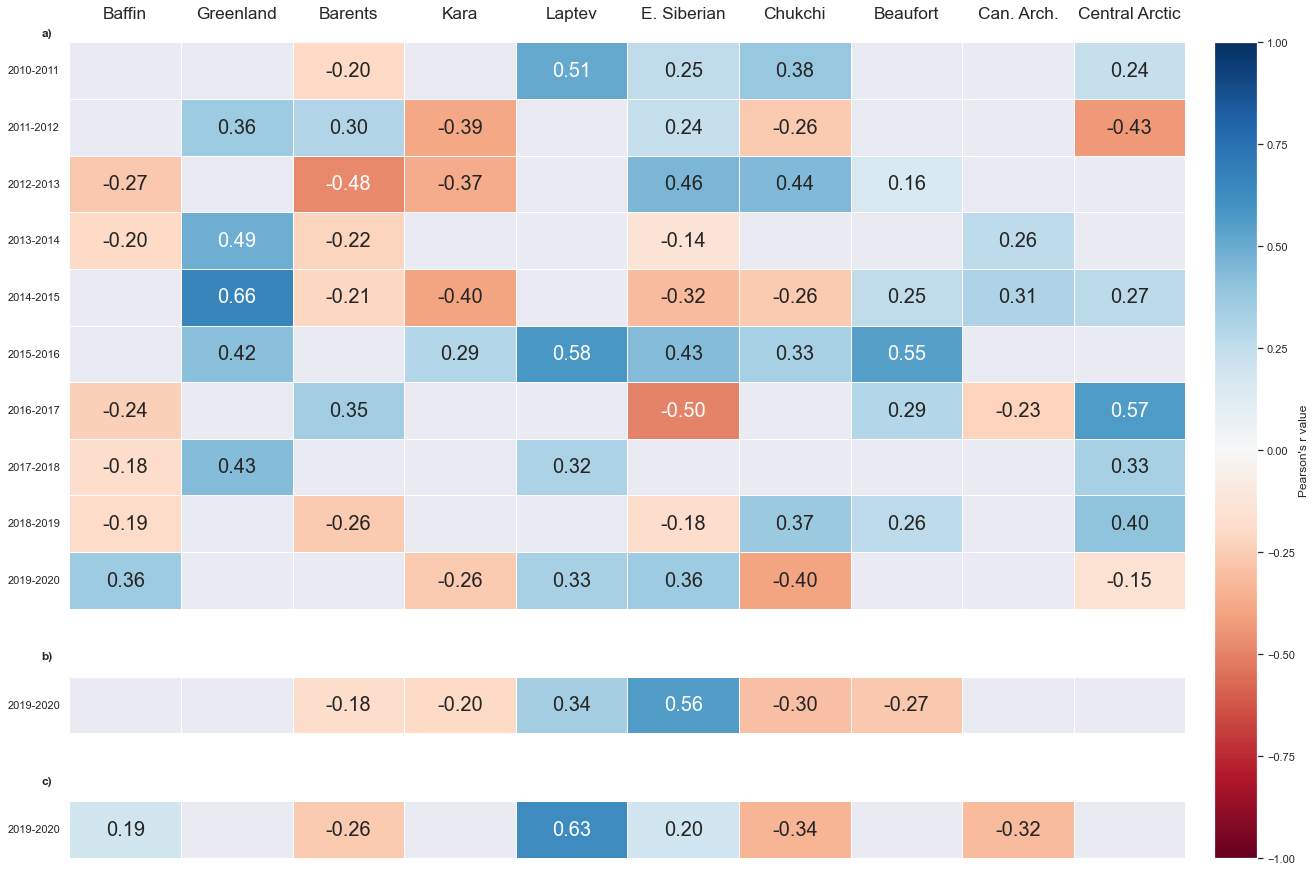

In [164]:
keys = ['Baffin','Greenland','Barents','Kara', 'Laptev', 'E. Siberian', 'Chukchi', 'Beaufort', 'Can. Arch.','Central Arctic']
fig = plt.figure(figsize = (20,15))
spec = gridspec.GridSpec(ncols=1, nrows=3,
                         width_ratios=[1], wspace=0.5,
                         hspace=0.3, height_ratios=[6,0.6,0.6])


# CS2_Bristol
ax1 = fig.add_subplot(spec[0])
mask = CS2_Bristol_ps.copy()
mask[mask>0.05] = 1000
mask[mask<1000] = 0
seasons = ['2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016','2016-2017','2017-2018','2018-2019',
          '2019-2020']


ax1 = sns.heatmap(df_CS2_Bristol, mask=mask, cmap='RdBu', annot=True, fmt=".2f", vmin=-1, vmax=1,linewidths=0.5, annot_kws={"fontsize":20}, cbar=None)
ax1.xaxis.tick_top()
ax1.set_xlabel(' ')    
ax1.set_yticklabels(seasons,rotation = 0)
ax1.set_xticklabels(keys,fontsize='x-large',y=1.02)
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labeltop=True)
ax1.set_title('a)', x = -0.02,y = 1,fontweight="bold")

# for (j,i), label in np.ndenumerate(df_CS2_Bristol.values):
#     if mask[j,i] == 1000:
#         ax1.text(i+0.5, j+0.5, label, 
#                 fontdict=dict(ha='center',  va='center',
#                                          color='k', fontsize=20))


# CS2_S3_CPOM
ax2 = fig.add_subplot(spec[1])

mask = CS2_S3_CPOM_ps.copy()
mask[mask>0.05] = 1000
mask[mask<1000] = 0
seasons = ['2019-2020']

ax2 = sns.heatmap(df_CS2_S3_CPOM, mask=mask, ax=ax2, cmap='RdBu', annot=True, fmt=".2f", vmin=-1, vmax=1,linewidths=0.5, annot_kws={"fontsize":20}, cbar=None)
ax2.set_xticks([])
ax2.set_yticklabels(seasons,rotation = 0)
ax2.set_title('b)', x = -0.02,y = 1.2,fontweight="bold")

# for (j,i), label in np.ndenumerate(df_CS2_S3_CPOM.values):
#     if mask[j,i] == 1000:
#         ax2.text(i+0.5, j+0.5, label, 
#                 fontdict=dict(ha='center',  va='center',
#                                          color='k', fontsize=20))
        
# CS2_S3_Bristol 
ax3 = fig.add_subplot(spec[2])        
mask = CS2_S3_Bristol_ps.copy()
mask[mask>0.05] = 1000
mask[mask<1000] = 0
seasons = ['2019-2020']
 
ax3 = sns.heatmap(df_CS2_S3_Bristol, mask=mask, ax=ax3, cmap='RdBu', annot=True, fmt=".2f", vmin=-1, vmax=1,linewidths=0.5, annot_kws={"fontsize":20}, cbar=None)
ax3.set_xticks([])
ax3.set_yticklabels(seasons,rotation = 0)
ax3.set_title('c)', x = -0.02,y = 1.2,fontweight="bold")

# for (j,i), label in np.ndenumerate(df_CS2_S3_Bristol.values):
#     if mask[j,i] == 1000:
#         ax3.text(i+0.5, j+0.5, label, 
#                 fontdict=dict(ha='center',  va='center',
#                                          color='k', fontsize=20))
    
cbar_ax = fig.add_axes([0.92, 0.125, 0.03, 0.755])
cb = fig.colorbar(x, cax=cbar_ax,label="Pearson's r value")

plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Snow Interpolated Freeboards/figures/supp_regional_stats.png',bbox_inches = "tight")